In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [22]:
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.drop(columns=["Cabin"], inplace=True)

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

features = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Embarked_S", "Embarked_Q"]

X = df[features]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [2]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Alternative non-sequential model definition:
# inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
# hidden1 = tf.keras.layers.Dense(64, activation='relu')(inputs)
# hidden2 = tf.keras.layers.Dense(32, activation='relu')(hidden1) 
# outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden2)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5924 - loss: 0.6760 - val_accuracy: 0.8182 - val_loss: 0.5554
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7776 - loss: 0.5447 - val_accuracy: 0.8182 - val_loss: 0.4785
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8108 - loss: 0.4816 - val_accuracy: 0.8322 - val_loss: 0.4462
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7926 - loss: 0.4747 - val_accuracy: 0.8322 - val_loss: 0.4263
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4793 - val_accuracy: 0.8322 - val_loss: 0.4195
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8262 - loss: 0.4199 - val_accuracy: 0.8322 - val_loss: 0.4142
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8201 - loss: 0.4100 - val_accuracy: 0.8322 - val_loss: 0.4110
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8137 - loss: 0.4231 - val_accuracy: 0.8392 - val_loss:

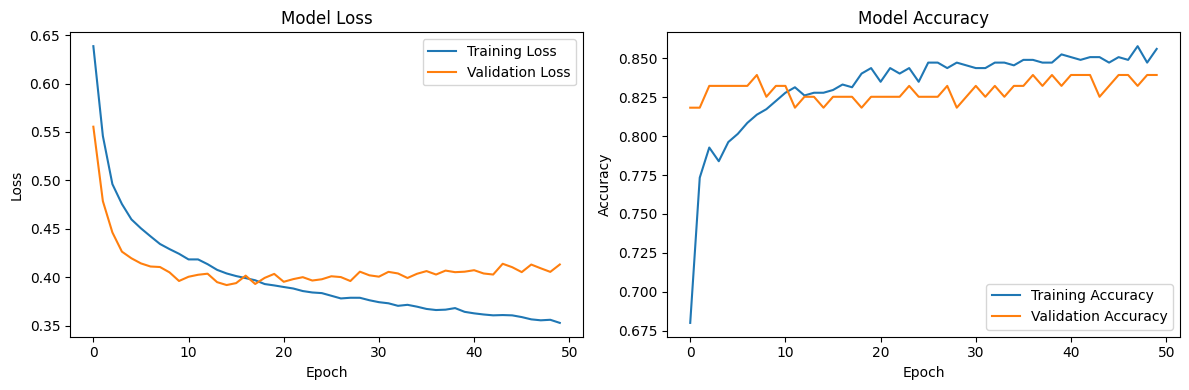

In [3]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 0.4266
Test Accuracy: 0.82


## Train Neural Network on MNIST dataset

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


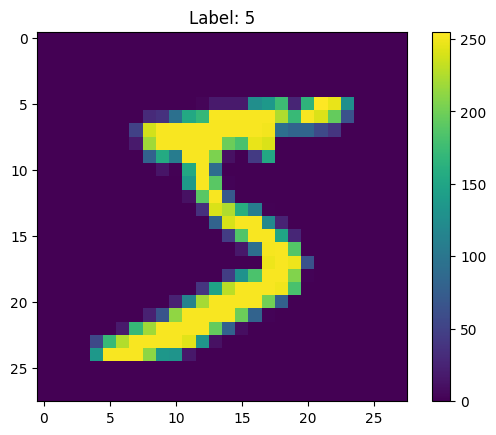

In [27]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
plt.imshow(X_train[0])
plt.colorbar()
plt.title(f"Label: {y_train[0]}")
plt.show()

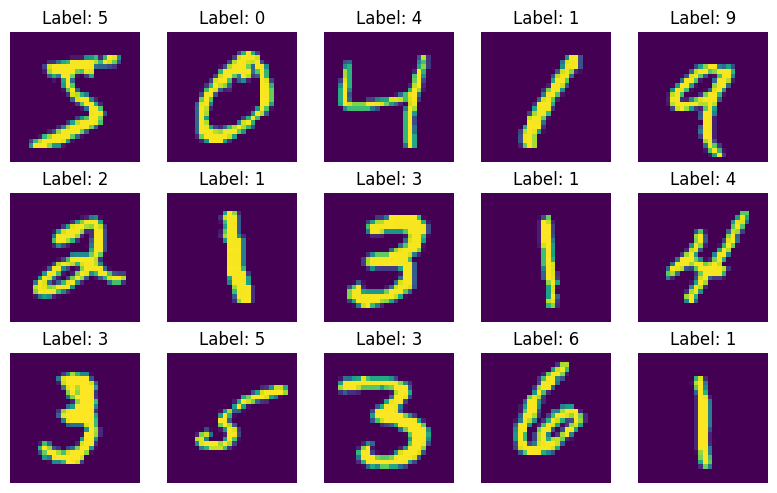

In [28]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Visualize the first 9 images
plt.figure(figsize=(8, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [29]:
# Define the deep model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    # tf.keras.layers.Dropout(0.2),                   # Dropout layer for regularization
    tf.keras.layers.Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    # tf.keras.layers.Dropout(0.2),                   # Another Dropout layer
    tf.keras.layers.Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.8629 - loss: 0.4651 - val_accuracy: 0.9622 - val_loss: 0.1267
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9662 - loss: 0.1095 - val_accuracy: 0.9654 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.9762 - loss: 0.0762 - val_accuracy: 0.9732 - val_loss: 0.0909
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.9848 - loss: 0.0492 - val_accuracy: 0.9688 - val_loss: 0.1076
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9753 - val_loss: 0.0931
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.9728 - val_loss: 0.0995
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9906 - loss: 0.0273 - val_accuracy: 0.9743 - val_loss: 0.1009
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.9936 -

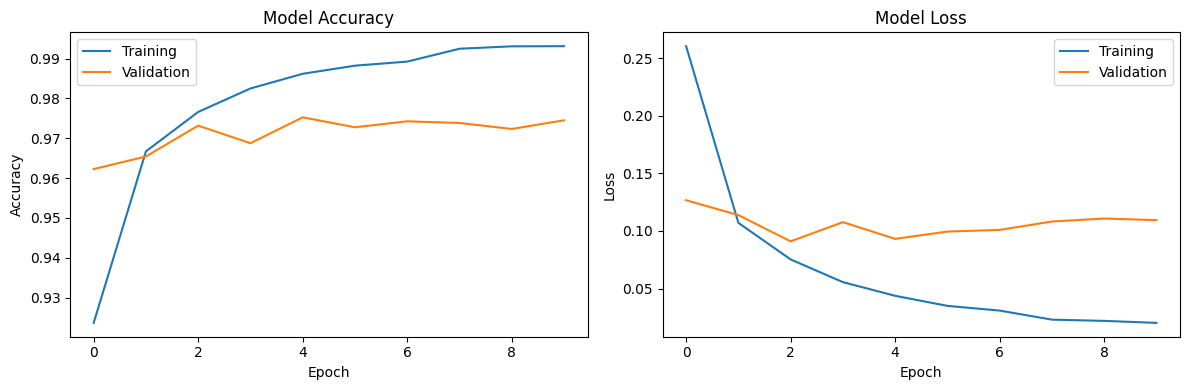

In [30]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9745 - loss: 0.0991
Test Accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


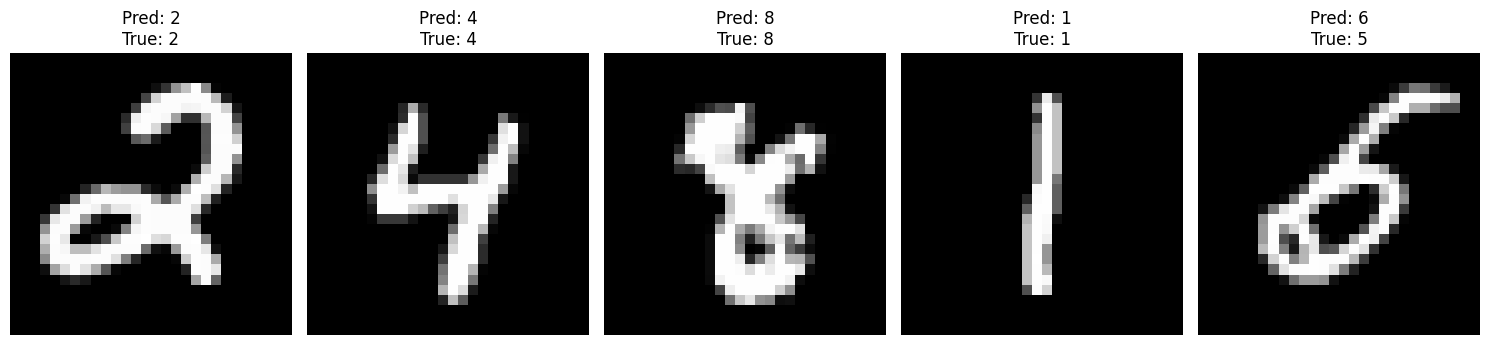

In [34]:
# Get predictions for test samples
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot a few test samples with their predictions
plt.figure(figsize=(15, 5))
num_samples = 5

for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    sample_idx = np.random.randint(0, len(X_test))
    
    # Reshape the sample if needed (assuming X_test is flattened)
    sample = X_test[sample_idx].reshape(28, 28)  # Adjust dimensions if needed
    
    plt.imshow(sample, cmap='gray')
    plt.title(f'Pred: {predicted_labels[sample_idx]}\nTrue: {y_test[sample_idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()